In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

In [ ]:
import csv
# Load your main dataframe
df = pd.read_csv('/content/Final_RDY_Steam_data_Expanded.csv')

In [ ]:
# Load name files (skip headers)
genres = pd.read_csv('unique_genres.csv', header=None).iloc[1:, 0].reset_index(drop=True)
categories = pd.read_csv('unique_categories.csv', header=None).iloc[1:, 0].reset_index(drop=True)
tags = pd.read_csv('unique_tags.csv', header=None).iloc[1:, 0].reset_index(drop=True)

# Prefix and clean column names
def clean_name(name):
    return name.strip().replace(' ', '_').replace('-', '_').replace("'", '').lower()

# Build genre renames
genre_cols = [f'Genres_Vector_{i}' for i in range(len(genres))]
genre_renames = {col: f'genre_{clean_name(name)}' for col, name in zip(genre_cols, genres)}

# Build category renames
category_cols = [f'Categories_Vector_{i}' for i in range(len(categories))]
category_renames = {col: f'category_{clean_name(name)}' for col, name in zip(category_cols, categories)}

# Build tag renames (only if index is within bounds)
tag_vector_cols = [col for col in df.columns if col.startswith('Tags_Vector_')]
tag_renames = {}
for col in tag_vector_cols:
    idx = int(col.split('_')[-1])
    if idx < len(tags):
        tag_renames[col] = f'tag_{clean_name(tags.iloc[idx])}'

# Combine and apply renames
all_renames = {**genre_renames, **category_renames, **tag_renames}
df.rename(columns=all_renames, inplace=True)

# Preview updated column names
print(df.columns[:30])


Index(['Name', 'Estimated owners', 'Price', 'DLC count', 'Supported languages',
       'Reviews', 'Mac', 'Linux', 'Positive', 'Negative', 'Achievements',
       'Average playtime forever', 'Developers', 'Publishers', 'release_year',
       'release_month', 'total_reviews', 'genre_360_video', 'genre_accounting',
       'genre_action', 'genre_adventure', 'genre_animation_&_modeling',
       'genre_audio_production', 'genre_casual', 'genre_design_&_illustration',
       'genre_documentary', 'genre_early_access', 'genre_education',
       'genre_episodic', 'genre_free_to_play'],
      dtype='object')


In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Don't wrap to multiple lines

df.head()


,Name,Estimated owners,Price,DLC count,Supported languages,Reviews,Mac,Linux,Positive,Negative,Achievements,Average playtime forever,Developers,Publishers,release_year,release_month,total_reviews,genre_360_video,genre_accounting,genre_action,genre_adventure,genre_animation_&_modeling,genre_audio_production,genre_casual,genre_design_&_illustration,genre_documentary,genre_early_access,genre_education,genre_episodic,genre_free_to_play,genre_game_development,genre_gore,genre_indie,genre_massively_multiplayer,genre_movie,genre_nudity,genre_photo_editing,genre_rpg,genre_racing,genre_sexual_content,genre_short,genre_simulation,genre_software_training,genre_sports,genre_strategy,genre_tutorial,genre_utilities,genre_video_production,genre_violent,genre_web_publishing,Genres_Vector_33,category_captions_available,category_co_op,category_commentary_available,category_cross_platform_multiplayer,category_full_controller_support,category_hdr_available,category_in_app_purchases,category_includes_source_sdk,category_includes_level_editor,category_lan_co_op,category_lan_pvp,category_mmo,category_mods,category_mods_(require_hl2),category_multi_player,category_online_co_op,category_online_pvp,category_partial_controller_support,category_pvp,category_remote_play_together,category_remote_play_on_phone,category_remote_play_on_tv,category_remote_play_on_tablet,category_shared/split_screen,category_shared/split_screen_co_op,category_shared/split_screen_pvp,category_single_player,category_stats,category_steam_achievements,category_steam_cloud,category_steam_leaderboards,category_steam_trading_cards,category_steam_turn_notifications,category_steam_workshop,category_steamvr_collectibles,category_tracked_controller_support,category_tracked_motion_controller_support,category_vr_only,category_vr_support,category_vr_supported,category_valve_anti_cheat_enabled,Categories_Vector_41,tag_1980s,tag_1990s,tag_2.5d,tag_2d,tag_2d_fighter,tag_2d_platformer,tag_360_video,tag_3d,tag_3d_fighter,tag_3d_platformer,tag_3d_vision,tag_4_player_local,tag_4x,tag_6dof,tag_8_bit_music,tag_atv,tag_abstract,tag_action,tag_action_rpg,tag_action_rts,tag_action_roguelike,tag_action_adventure,tag_addictive,tag_adventure,tag_agriculture,tag_aliens,tag_alternate_history,tag_ambient,tag_america,tag_animation_&_modeling,tag_anime,tag_arcade,tag_archery,tag_arena_shooter,tag_artificial_intelligence,tag_assassin,tag_asymmetric_vr,tag_asynchronous_multiplayer,tag_atmospheric,tag_audio_production,tag_auto_battler,tag_automation,tag_automobile_sim,tag_bmx,tag_base_building,tag_baseball,tag_based_on_a_novel,tag_basketball,tag_batman,tag_battle_royale,tag_beat_em_up,tag_beautiful,tag_benchmark,tag_bikes,tag_birds,tag_blood,tag_board_game,tag_boss_rush,tag_bowling,tag_boxing,tag_building,tag_bullet_hell,tag_bullet_time,tag_crpg,tag_capitalism,tag_card_battler,tag_card_game,tag_cartoon,tag_cartoony,tag_casual,tag_cats,tag_character_action_game,tag_character_customization,tag_chess,tag_choices_matter,tag_choose_your_own_adventure,tag_cinematic,tag_city_builder,tag_class_based,tag_classic,tag_clicker,tag_co_op,tag_co_op_campaign,tag_coding,tag_cold_war,tag_collectathon,tag_colony_sim,tag_colorful,tag_combat,tag_combat_racing,tag_comedy,tag_comic_book,tag_competitive,tag_conspiracy,tag_controller,tag_conversation,tag_cooking,tag_cozy,tag_crafting,tag_creature_collector,tag_cricket,tag_crime,tag_crowdfunded,tag_cult_classic,tag_cute,tag_cyberpunk,tag_cycling,tag_dark,tag_dark_comedy,tag_dark_fantasy,tag_dark_humor,tag_dating_sim,tag_deckbuilding,tag_demons,tag_design_&_illustration,tag_destruction,tag_detective,tag_difficult,tag_dinosaurs,tag_diplomacy,tag_documentary,tag_dog,tag_dragons,tag_drama,tag_driving,tag_dungeon_crawler,tag_dungeons_&_dragons,tag_dynamic_narration,tag_dystopian,tag_early_access,tag_economy,tag_education,tag_electronic,tag_electronic_music,tag_emotional,tag_epic,tag_episodic,tag_escape_room,tag_experience,tag_experimental,tag_exploration,tag_extraction_shooter,tag_fmv,tag_fps,

In [ ]:
df['log_avg_playtime'] = np.log1p(df['Average playtime forever'])

In [ ]:
from scipy.stats import chi2_contingency
import scipy.stats as stats

# Split the dataset based on UGC features
ugc_games = df[
    (df['category_steam_workshop'] == 1.0) |
    (df['category_includes_level_editor'] == 1.0)
]
non_ugc_games = df[
    (df['category_steam_workshop'] == 0.0) &
    (df['category_includes_level_editor'] == 0.0)
]

# Extract playtime columns (log-transformed and raw)
ugc_log_playtime = ugc_games['log_avg_playtime']
non_ugc_log_playtime = non_ugc_games['log_avg_playtime']

ugc_raw_playtime = ugc_games['Average playtime forever'].dropna()
non_ugc_raw_playtime = non_ugc_games['Average playtime forever'].dropna()

# Data quality check: how many games have zero playtime?
print("Playtime data check:")
print(f"UGC games with playtime = 0: {(ugc_log_playtime == 0).sum()} "
      f"({(ugc_log_playtime == 0).mean() * 100:.1f}%)")
print(f"Non-UGC games with playtime = 0: {(non_ugc_log_playtime == 0).sum()} "
      f"({(non_ugc_log_playtime == 0).mean() * 100:.1f}%)")

# Basic distribution summaries
print("\nPlaytime distribution (UGC games):")
print(ugc_log_playtime.describe())

print("\nPlaytime distribution (Non-UGC games):")
print(non_ugc_log_playtime.describe())

# Filter to only non-zero playtime values
ugc_log_nonzero = ugc_log_playtime[ugc_log_playtime > 0]
non_ugc_log_nonzero = non_ugc_log_playtime[non_ugc_log_playtime > 0]

print(f"\nNon-zero UGC games: {len(ugc_log_nonzero)} "
      f"({len(ugc_log_nonzero)/len(ugc_log_playtime)*100:.1f}%)")
print(f"Non-zero Non-UGC games: {len(non_ugc_log_nonzero)} "
      f"({len(non_ugc_log_nonzero)/len(non_ugc_log_playtime)*100:.1f}%)")

print(f"UGC Games non-zero log_avg_playtime (median): {ugc_log_nonzero.median():.3f}")
print(f"Non-UGC Games non-zero log_avg_playtime (median): {non_ugc_log_nonzero.median():.3f}")

# Statistical test: Mann–Whitney U (non-zero log playtime)
u_stat_nonzero, p_nonzero = stats.mannwhitneyu(
    ugc_log_nonzero, non_ugc_log_nonzero, alternative='greater'
)
print(f"\nNon-zero log playtime comparison (Mann–Whitney U):")
print(f"U = {u_stat_nonzero:.0f}, p-value = {p_nonzero:.2e}")

# Statistical test: Mann–Whitney U (raw average playtime)
u_stat_avg, p_avg = stats.mannwhitneyu(
    ugc_raw_playtime, non_ugc_raw_playtime, alternative='greater'
)
print(f"\nRaw average playtime comparison (Mann–Whitney U):")
print(f"U = {u_stat_avg:.0f}, p-value = {p_avg:.2e}")

# Chi-square test: presence of playtime (non-zero vs zero)
contingency = [
    [len(ugc_log_nonzero), len(ugc_log_playtime) - len(ugc_log_nonzero)],
    [len(non_ugc_log_nonzero), len(non_ugc_log_playtime) - len(non_ugc_log_nonzero)]
]
chi2, p_chi2, _, _ = chi2_contingency(contingency)

print(f"\nChi-square test for presence of playtime:")
print(f"Chi² = {chi2:.2f}, p-value = {p_chi2:.2e}")


Playtime data check:
UGC games with playtime = 0: 1834 (57.3%)
Non-UGC games with playtime = 0: 79602 (84.2%)

Playtime distribution (UGC games):
count    3203.000000
mean        2.501635
std         3.082290
min         0.000000
25%         0.000000
50%         0.000000
75%         5.577839
max        10.523069
Name: log_avg_playtime, dtype: float64

Playtime distribution (Non-UGC games):
count    94511.000000
mean         0.805384
std          1.978858
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.889497
Name: log_avg_playtime, dtype: float64

Non-zero UGC games: 1369 (42.7%)
Non-zero Non-UGC games: 14909 (15.8%)
UGC Games non-zero log_avg_playtime (median): 5.846
Non-UGC Games non-zero log_avg_playtime (median): 5.361

Non-zero log playtime comparison (Mann–Whitney U):
U = 12805594, p-value = 2.36e-55

Raw average playtime comparison (Mann–Whitney U):
U = 194775766, p-value = 0.00e+00

Chi-square test for presence of playtime:

T-test: Free vs Paid Games (log-transformed playtime)
t-statistic = -33.656
p-value     = 7.11e-246
Mean log playtime (free games): 0.53
Mean log playtime (paid games): 0.98
n (free) = 25543, n (paid) = 72171


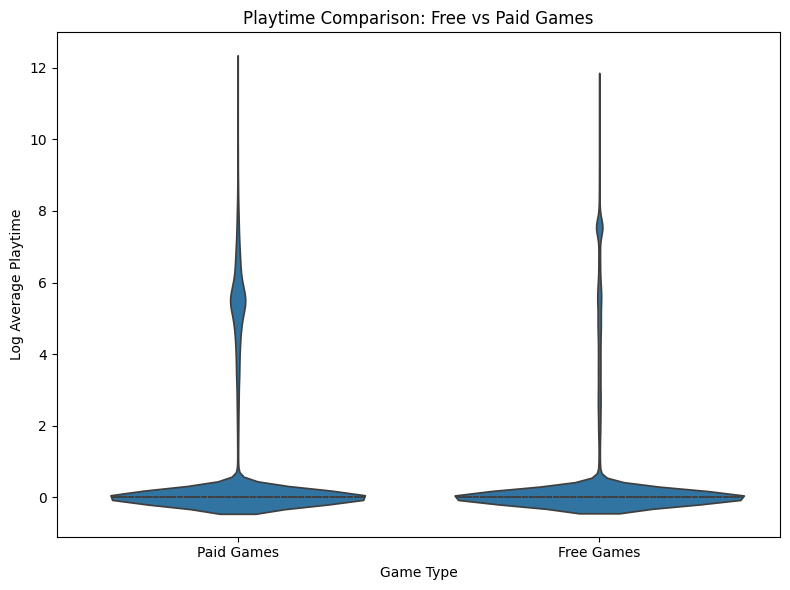

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Create a binary column for free games
df['is_free'] = (df['Price'] == 0).astype(int)

# Split the dataset
free_playtime = df[df['is_free'] == 1]['log_avg_playtime']
paid_playtime = df[df['is_free'] == 0]['log_avg_playtime']

# Run Welch's t-test (assumes unequal variances)
t_stat, p_val = ttest_ind(free_playtime, paid_playtime, equal_var=False)

# Display results
print("T-test: Free vs Paid Games (log-transformed playtime)")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value     = {p_val:.2e}")
print(f"Mean log playtime (free games): {free_playtime.mean():.2f}")
print(f"Mean log playtime (paid games): {paid_playtime.mean():.2f}")
print(f"n (free) = {len(free_playtime)}, n (paid) = {len(paid_playtime)}")

# Violin visualisation
# Create the 'is_free' column if not already done
df['is_free'] = (df['Price'] == 0).astype(int)

# Set up the plot
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='is_free',
    y='log_avg_playtime',
    data=df,
    inner='quartile'
)

# Customise axis labels and title
plt.xticks([0, 1], ['Paid Games', 'Free Games'])
plt.xlabel('Game Type')
plt.ylabel('Log Average Playtime')
plt.title('Playtime Comparison: Free vs Paid Games')

# Improve layout
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm

X = df[['total_reviews']]
y = df['log_avg_playtime']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       log_avg_playtime   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1774.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:56:21   Log-Likelihood:            -2.0777e+05
No. Observations:               97714   AIC:                         4.155e+05
Df Residuals:                   97712   BIC:                         4.156e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8345      0.007    127.981

Analysing which genres are associated with high avg playtimes

In [ ]:
genre_cols = [col for col in df.columns if col.startswith('genre_')]
for genre in genre_cols:
    avg = df[df[genre] == 1]['log_avg_playtime'].mean()
    print(f"{genre}: {avg:.2f}")


genre_360_video: 0.00
genre_accounting: 0.66
genre_action: 0.90
genre_adventure: 0.84
genre_animation_&_modeling: 0.77
genre_audio_production: 1.05
genre_casual: 0.62
genre_design_&_illustration: 0.84
genre_documentary: 0.00
genre_early_access: 0.56
genre_education: 0.41
genre_episodic: 0.00
genre_free_to_play: 0.82
genre_game_development: 0.42
genre_gore: 1.02
genre_indie: 0.83
genre_massively_multiplayer: 1.47
genre_movie: 2.03
genre_nudity: 1.09
genre_photo_editing: 0.71
genre_rpg: 1.22
genre_racing: 0.90
genre_sexual_content: 1.09
genre_short: 0.00
genre_simulation: 1.07
genre_software_training: 0.78
genre_sports: 0.87
genre_strategy: 1.19
genre_tutorial: 0.00
genre_utilities: 0.02
genre_video_production: 0.90
genre_violent: 0.73
genre_web_publishing: 0.90


Analysing which tags are associated with high avg playtimes

In [ ]:
tag_cols = [col for col in df.columns if col.startswith('tag_')]

# Count how many games have each tag
tag_counts = df[tag_cols].sum()

# Keep tags that appear in at least 100 games
common_tags = tag_counts[tag_counts >= 100].index.tolist()

for tag in common_tags:
    avg = df[df[tag] == 1]['log_avg_playtime'].mean()
    print(f"{tag}: {avg:.2f}")

tag_playtime = {
    tag: df[df[tag] == 1]['log_avg_playtime'].mean()
    for tag in common_tags
}

# Convert to DataFrame and sort
tag_playtime_df = pd.DataFrame.from_dict(tag_playtime, orient='index', columns=['log_avg_playtime'])
tag_playtime_df['real_hours'] = np.expm1(tag_playtime_df['log_avg_playtime'])
tag_playtime_df = tag_playtime_df.sort_values(by='log_avg_playtime', ascending=False)

# View top 20
print(tag_playtime_df.head(20))


tag_1980s: 0.58
tag_1990s: 0.87
tag_2.5d: 1.05
tag_2d: 1.01
tag_2d_fighter: 1.08
tag_2d_platformer: 0.37
tag_3d: 0.58
tag_3d_fighter: 0.62
tag_3d_platformer: 0.69
tag_3d_vision: 1.06
tag_4_player_local: 1.40
tag_4x: 3.15
tag_6dof: 0.60
tag_abstract: 0.60
tag_action: 1.12
tag_action_rpg: 1.59
tag_action_rts: 0.85
tag_action_roguelike: 1.11
tag_action_adventure: 0.52
tag_addictive: 2.22
tag_adventure: 1.11
tag_agriculture: 1.56
tag_aliens: 1.24
tag_alternate_history: 1.40
tag_america: 1.49
tag_animation_&_modeling: 0.96
tag_anime: 1.79
tag_arcade: 0.85
tag_archery: 0.59
tag_arena_shooter: 0.74
tag_artificial_intelligence: 0.64
tag_assassin: 1.86
tag_asymmetric_vr: 0.71
tag_asynchronous_multiplayer: 1.44
tag_atmospheric: 1.08
tag_audio_production: 1.29
tag_auto_battler: 0.97
tag_automation: 1.21
tag_automobile_sim: 1.88
tag_base_building: 1.83
tag_basketball: 1.36
tag_battle_royale: 1.10
tag_beat_em_up: 1.62
tag_beautiful: 1.75
tag_bikes: 1.76
tag_blood: 1.92
tag_board_game: 1.24
tag_boxi